In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
housing = pd.read_csv('train_imputed.csv', index_col=0)
housing.shape
housing.sample(10)

(1460, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
159,60,FV,100.000000,12552,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,222,Unf,0,769,991,GasA,Ex,Y,SBrkr,991,956,0,1947,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,678,TA,TA,Y,0,136,0,0,0,0,No_Pool,GdWo,No_MF,0,5,2010,WD,Normal,254900
1111,60,RL,65.871754,8000,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,219,Unf,0,554,773,GasA,Gd,Y,SBrkr,773,885,0,1658,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1995.0,Fin,2,431,TA,TA,Y,224,84,0,0,0,0,No_Pool,No_Fence,No_MF,0,6,2008,WD,Normal,188000
1093,50,RL,60.000000,8400,Pave,No_Alley,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,6,5,1925,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,423,Unf,0,758,1181,GasA,Fa,Y,SBrkr,1390,304,0,1694,0,0,2,0,4,1,TA,7,Typ,1,Gd,Detchd,1925.0,Unf,2,576,TA,TA,Y,342,0,128,0,0,0,No_Pool,No_Fence,No_MF,0,6,2008,WD,Normal,136500
1437,20,RL,60.000000,9000,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,No_FP,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,No_Pool,GdWo,No_MF,0,5,2007,WD,Normal,120500
1193,50,RM,60.000000,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1925,1994,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0,Unf,0,702,702,GasA,Gd,Y,SBrkr,842,630,0,1472,0,0,1,0,3,1,Gd,6,Typ,0,No_FP,Detchd,1925.0,Unf,1,250,TA,Fa,P,0,0,84,0,0,0,No_Pool,GdWo,No_MF,0,7,2007,WD,Normal,125000
933,20,RL,84.000000,11670,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,No_Pool,No_Fence,No_MF,0,3,2007,WD,Normal,320000
378,60,FV,102.000000,11143,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1580,1580,GasA,Ex,Y,SBrkr,1580,886,0,2466,0,0,3,0,4,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,610,TA,TA,Y,159,214,0,0,0,0,No_Pool,No_Fence,No_MF,0,12,2007,WD,Normal,340000
1459,20,RL,68.000000,9717,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No_FP,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,No_Pool,No_Fence,No_MF,0,4,2010,WD,Normal,142125
1444,30,RL,67.711167,8854,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,0,0,40,0,No_Pool,No_Fence,No_MF,0,5,2009

# features by type

In [17]:
categories = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
             'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
             'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
             'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
             'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
             'PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MoSold']

continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal']

years = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

hybrid = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
          'TotRmsAbvGrd','Fireplaces','GarageCars']

# features by grouping of relevance

In [26]:
ms_col = ['MSSubClass','MSZoning']
lot_col = ['LotShape','LotConfig','LotArea','LandContour','LandSlope','Utilities']
location_col = ['Neighborhood','Condition1','Condition2']
building_house_col = ['BldgType','HouseStyle']
roof_col = ['RoofStyle','RoofMatl']
exterior_col = ['Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond']
bsmt_col = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
           'TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
energy_col = ['Heating','HeatingQC','CentralAir','Electrical']
floors_col = ['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']
rooms_col = ['FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual',
             'TotRmsAbvGrd']
fireplace_col = ['Fireplaces','FireplaceQu']
garage_col = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive']
porch_col = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
pool_col = ['PoolArea','PoolQC']
fence_col = ['Fence']
misc_col = ['MiscFeature','MiscVal']
sale_col = ['MoSold','YrSold','SaleType','SaleCondition']


# ms_col
lets look at ms_col

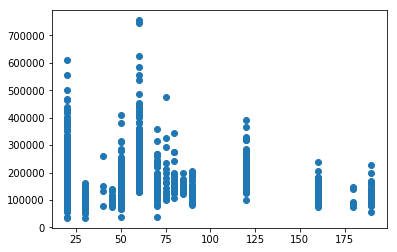

In [33]:
plt.scatter(housing[ms_col[0]],housing.SalePrice)

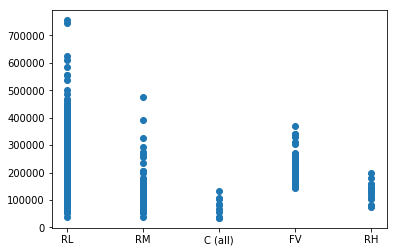

In [34]:
plt.scatter(housing[ms_col[1]],housing.SalePrice)

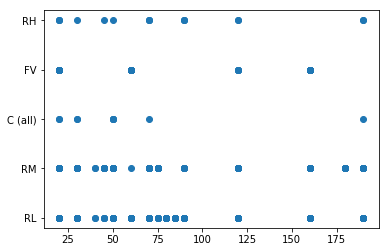

In [35]:
plt.scatter(housing[ms_col[0]],housing[ms_col[1]])

In [36]:
housing[ms_col[0]].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [37]:
housing[ms_col[1]].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

# lot_col

ok, nothing to change with ms_col. lets move onto lot_col

In [40]:
lot_col

['LotShape', 'LotConfig', 'LotArea', 'LandContour', 'LandSlope', 'Utilities']

In [41]:
for i in lot_col:
    housing[i].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

7200      25
9600      24
6000      17
10800     14
9000      14
8400      14
1680      10
7500       9
8125       8
9100       8
6120       8
6240       8
3182       7
7800       6
8450       6
10000      5
4500       5
4435       5
5000       5
10140      5
9750       5
10400      5
5400       5
7018       4
11700      4
9375       4
8800       4
9900       4
8750       4
6600       4
7000       4
8640       4
10625      4
13125      4
11250      4
8544       4
8520       4
8500       4
6762       3
10500      3
2117       3
12090      3
11600      3
10440      3
8712       3
11500      3
10200      3
7750       3
14115      3
9200       3
2280       3
9084       3
4426       3
13891      3
9120       3
8000       3
8777       3
3675       3
7875       3
9920       3
8012       3
2522       3
11645      2
7420       2
15611      2
5500       2
9591       2
6292       2
9571       2
8172       2
10382      2
9500       2
11616      2
13600      2
9525       2
9790       2
7917       2

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

utilities seem to only have 1 value of 'NoSeWa'. lets check this out

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0adb3bf98>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0adc17940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0adb3be48>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0adc17fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0ae49c358>],
 'means': []}

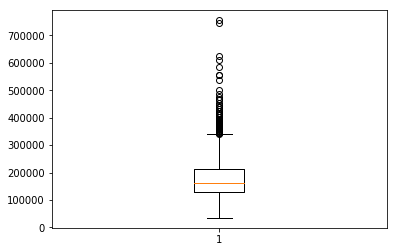

In [47]:
plt.boxplot(housing.loc[housing.Utilities=='AllPub','SalePrice'])


In [48]:
housing.loc[housing.Utilities=='NoSeWa','SalePrice']

Id
945    137500
Name: SalePrice, dtype: int64

will drop Utilities since only 1 row has value NoSeWa, all else is AllPub

In [49]:
lot_col

['LotShape', 'LotConfig', 'LotArea', 'LandContour', 'LandSlope', 'Utilities']

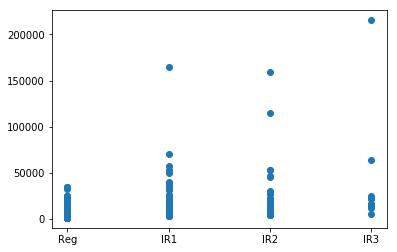

In [50]:
plt.scatter(housing['LotShape'],housing['LotArea'])

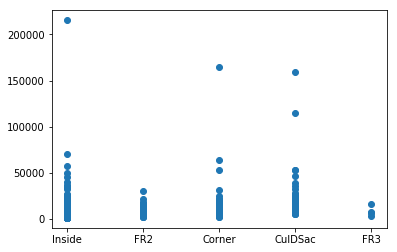

In [51]:
plt.scatter(housing['LotConfig'],housing['LotArea'])

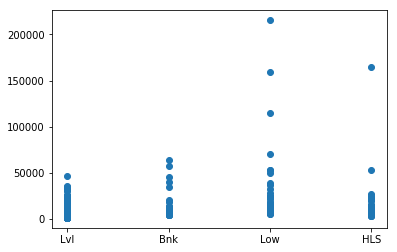

In [52]:
plt.scatter(housing['LandContour'],housing['LotArea'])

ok, clearly there's 4 major outliers. we will remove and plot everything vs LotArea

In [53]:
housing_no_lotarea_outlier = housing[housing.LotArea<100000]

Text(0.5, 1.0, 'LotShape vs. LotArea')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LotConfig vs. LotArea')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LotArea vs. LotArea')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LandContour vs. LotArea')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LandSlope vs. LotArea')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Utilities vs. LotArea')

<Figure size 720x720 with 0 Axes>

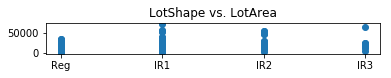

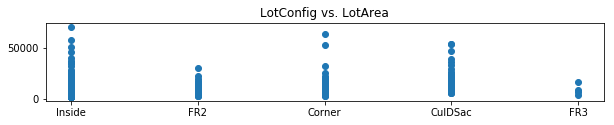

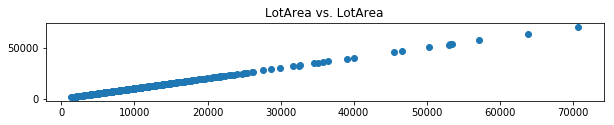

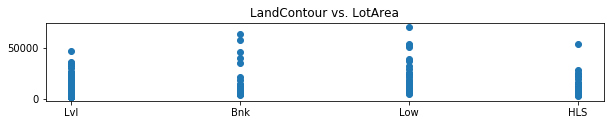

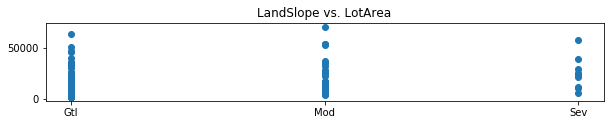

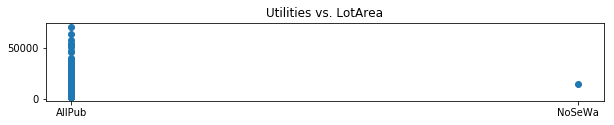

<Figure size 720x720 with 0 Axes>

In [63]:
j=0
for i in lot_col:
    j+=1
    plt.subplot(6,1,j)
    plt.scatter(housing_no_lotarea_outlier[i],housing_no_lotarea_outlier.LotArea)
    plt.title(i + ' vs. LotArea')
    plt.figure(figsize=(10,10))

Text(0.5, 1.0, 'LotShape vs. SalePrice')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LotConfig vs. SalePrice')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LotArea vs. SalePrice')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LandContour vs. SalePrice')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LandSlope vs. SalePrice')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Utilities vs. SalePrice')

<Figure size 720x720 with 0 Axes>

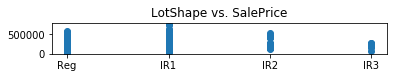

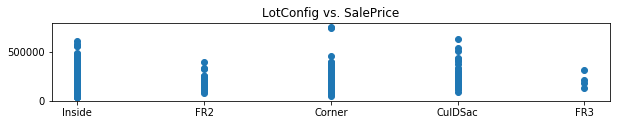

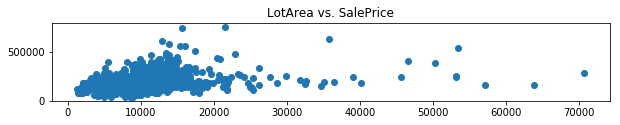

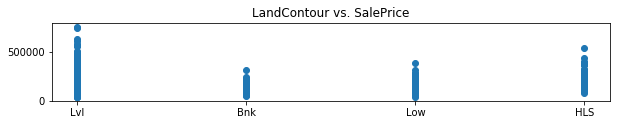

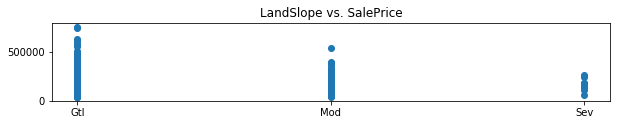

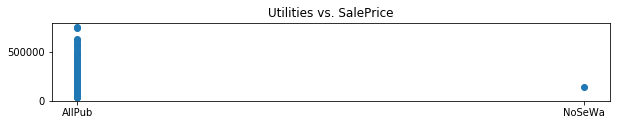

<Figure size 720x720 with 0 Axes>

In [64]:
j=0
for i in lot_col:
    j+=1
    plt.subplot(6,1,j)
    plt.scatter(housing_no_lotarea_outlier[i],housing_no_lotarea_outlier.SalePrice)
    plt.title(i + ' vs. SalePrice')
    plt.figure(figsize=(10,10))

In [65]:
lot_col

['LotShape', 'LotConfig', 'LotArea', 'LandContour', 'LandSlope', 'Utilities']

Text(0.5, 1.0, 'LotShape vs. LotShape')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LotConfig vs. LotShape')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LotArea vs. LotShape')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LandContour vs. LotShape')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'LandSlope vs. LotShape')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Utilities vs. LotShape')

<Figure size 720x720 with 0 Axes>

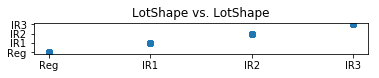

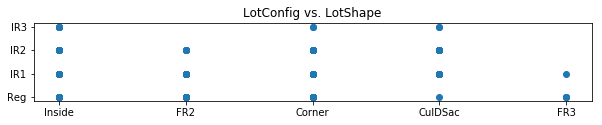

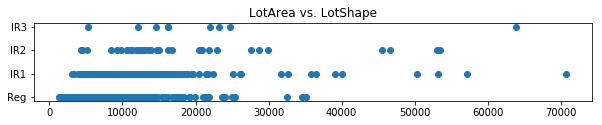

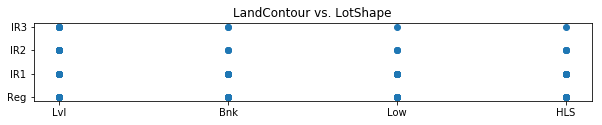

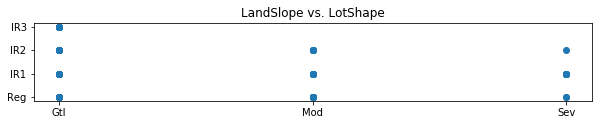

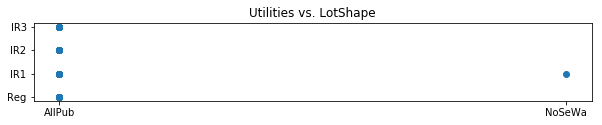

<Figure size 720x720 with 0 Axes>

In [66]:
j=0
for i in lot_col:
    j+=1
    plt.subplot(6,1,j)
    plt.scatter(housing_no_lotarea_outlier[i],housing_no_lotarea_outlier.LotShape)
    plt.title(i + ' vs. LotShape')
    plt.figure(figsize=(10,10))

In [89]:
lot_col = ['LotShape','LotConfig','LotArea','LandContour','LandSlope'] #remove utilities from further analysis

lets look at the combinatorical distribution of all categorical features in  lot_col

In [70]:
housing.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

165422.74465240643

145950.0

748

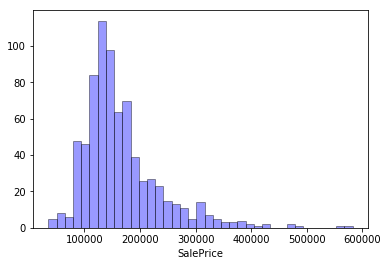

In [78]:
reg_x_inside = housing[(housing.LotShape=='Reg') & (housing.LotConfig =='Inside')]
reg_x_inside.SalePrice.mean()
reg_x_inside.SalePrice.median()
reg_x_inside.SalePrice.count()

sns.distplot(reg_x_inside.SalePrice, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [84]:
lot_col2 = ['LotShape','LotConfig','LandContour','LandSlope']

bob = housing['LotShape'].unique()

matrix_value = housing[housing['LotShape']==bob[0]]

created a function to create dataframes to look at all combinations of values among categories in a feature_set

In [164]:
#create a dataframe of all categorical combinations in each feature set
#please make sure only all items in feature_list refer to features that are categorical!!!

def categorical_matrix(feature_list):
    list_for_matrix = []
    for i in feature_list:
        for j in feature_list:
            if i == j:
                pass
            else:
                for k in housing[i].unique():
                    for k2 in housing[j].unique():
                        inner_list = []
#                         print(k + " : " + i)
#                         print("")
#                         print(k2 + ' : ' + j)
#                         print(housing.loc[(housing[i]==k)&(housing[j]==k2),'SalePrice'].count())
                        
                        matrix_value_count = housing.loc[(housing[i]==k)&(housing[j]==k2),'SalePrice'].count()
                        
                        inner_list.append(k)
                        inner_list.append(i)
                        inner_list.append(k2)
                        inner_list.append(j)
                        inner_list.append(matrix_value_count)
                        
                        list_for_matrix.append(inner_list)
    
    return pd.DataFrame(list_for_matrix, columns=['Value1','Feature1','Value2','Feature2','Count'])
    

In [165]:
df_lot_col2 = categorical_matrix(lot_col2)

In [120]:
df_lot_col2

,Value1,Feature1,Value2,Feature2,Count
0,Reg,LotShape,Inside,LotConfig,748
1,Reg,LotShape,FR2,LotConfig,27
2,Reg,LotShape,Corner,LotConfig,146
3,Reg,LotShape,CulDSac,LotConfig,1
4,Reg,LotShape,FR3,LotConfig,3
5,IR1,LotShape,Inside,LotConfig,284
6,IR1,LotShape,FR2,LotConfig,15
7,IR1,LotShape,Corner,LotConfig,107
8,IR1,LotShape,CulDSac,LotConfig,77
9,IR1,LotShape,FR3,LotConfig,1


# location_col
cannot find anything interesting in lot_col. lets move onto location_col

In [122]:
location_col

['Neighborhood', 'Condition1', 'Condition2']

In [123]:
housing[location_col]

,Neighborhood,Condition1,Condition2
Id,,,
1,CollgCr,Norm,Norm
2,Veenker,Feedr,Norm
3,CollgCr,Norm,Norm
4,Crawfor,Norm,Norm
5,NoRidge,Norm,Norm
6,Mitchel,Norm,Norm
7,Somerst,Norm,Norm
8,NWAmes,PosN,Norm
9,OldTown,Artery,Norm


In [124]:
housing.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [125]:
housing.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [126]:
housing.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [127]:
df_location = categorical_matrix(location_col)

CollgCr : Neighborhood

Norm : Condition1
148
CollgCr : Neighborhood

Feedr : Condition1
0
CollgCr : Neighborhood

PosN : Condition1
2
CollgCr : Neighborhood

Artery : Condition1
0
CollgCr : Neighborhood

RRAe : Condition1
0
CollgCr : Neighborhood

RRNn : Condition1
0
CollgCr : Neighborhood

RRAn : Condition1
0
CollgCr : Neighborhood

PosA : Condition1
0
CollgCr : Neighborhood

RRNe : Condition1
0
Veenker : Neighborhood

Norm : Condition1
8
Veenker : Neighborhood

Feedr : Condition1
3
Veenker : Neighborhood

PosN : Condition1
0
Veenker : Neighborhood

Artery : Condition1
0
Veenker : Neighborhood

RRAe : Condition1
0
Veenker : Neighborhood

RRNn : Condition1
0
Veenker : Neighborhood

RRAn : Condition1
0
Veenker : Neighborhood

PosA : Condition1
0
Veenker : Neighborhood

RRNe : Condition1
0
Crawfor : Neighborhood

Norm : Condition1
48
Crawfor : Neighborhood

Feedr : Condition1
1
Crawfor : Neighborhood

PosN : Condition1
1
Crawfor : Neighborhood

Artery : Condition1
0
Crawfor : Neighborho

0
NoRidge : Neighborhood

RRNn : Condition2
0
NoRidge : Neighborhood

Feedr : Condition2
0
NoRidge : Neighborhood

PosN : Condition2
0
NoRidge : Neighborhood

PosA : Condition2
0
NoRidge : Neighborhood

RRAn : Condition2
0
NoRidge : Neighborhood

RRAe : Condition2
0
Mitchel : Neighborhood

Norm : Condition2
49
Mitchel : Neighborhood

Artery : Condition2
0
Mitchel : Neighborhood

RRNn : Condition2
0
Mitchel : Neighborhood

Feedr : Condition2
0
Mitchel : Neighborhood

PosN : Condition2
0
Mitchel : Neighborhood

PosA : Condition2
0
Mitchel : Neighborhood

RRAn : Condition2
0
Mitchel : Neighborhood

RRAe : Condition2
0
Somerst : Neighborhood

Norm : Condition2
86
Somerst : Neighborhood

Artery : Condition2
0
Somerst : Neighborhood

RRNn : Condition2
0
Somerst : Neighborhood

Feedr : Condition2
0
Somerst : Neighborhood

PosN : Condition2
0
Somerst : Neighborhood

PosA : Condition2
0
Somerst : Neighborhood

RRAn : Condition2
0
Somerst : Neighborhood

RRAe : Condition2
0
NWAmes : Neighborhood

0
Artery : Condition1

NAmes : Neighborhood
15
Artery : Condition1

SawyerW : Neighborhood
0
Artery : Condition1

IDOTRR : Neighborhood
2
Artery : Condition1

MeadowV : Neighborhood
0
Artery : Condition1

Edwards : Neighborhood
6
Artery : Condition1

Timber : Neighborhood
0
Artery : Condition1

Gilbert : Neighborhood
0
Artery : Condition1

StoneBr : Neighborhood
0
Artery : Condition1

ClearCr : Neighborhood
0
Artery : Condition1

NPkVill : Neighborhood
0
Artery : Condition1

Blmngtn : Neighborhood
0
Artery : Condition1

BrDale : Neighborhood
0
Artery : Condition1

SWISU : Neighborhood
0
Artery : Condition1

Blueste : Neighborhood
0
RRAe : Condition1

CollgCr : Neighborhood
0
RRAe : Condition1

Veenker : Neighborhood
0
RRAe : Condition1

Crawfor : Neighborhood
0
RRAe : Condition1

NoRidge : Neighborhood
0
RRAe : Condition1

Mitchel : Neighborhood
0
RRAe : Condition1

Somerst : Neighborhood
0
RRAe : Condition1

NWAmes : Neighborhood
0
RRAe : Condition1

OldTown : Neighborhood
0
RRAe : Co

0
RRNn : Condition2

Crawfor : Neighborhood
0
RRNn : Condition2

NoRidge : Neighborhood
0
RRNn : Condition2

Mitchel : Neighborhood
0
RRNn : Condition2

Somerst : Neighborhood
0
RRNn : Condition2

NWAmes : Neighborhood
0
RRNn : Condition2

OldTown : Neighborhood
1
RRNn : Condition2

BrkSide : Neighborhood
1
RRNn : Condition2

Sawyer : Neighborhood
0
RRNn : Condition2

NridgHt : Neighborhood
0
RRNn : Condition2

NAmes : Neighborhood
0
RRNn : Condition2

SawyerW : Neighborhood
0
RRNn : Condition2

IDOTRR : Neighborhood
0
RRNn : Condition2

MeadowV : Neighborhood
0
RRNn : Condition2

Edwards : Neighborhood
0
RRNn : Condition2

Timber : Neighborhood
0
RRNn : Condition2

Gilbert : Neighborhood
0
RRNn : Condition2

StoneBr : Neighborhood
0
RRNn : Condition2

ClearCr : Neighborhood
0
RRNn : Condition2

NPkVill : Neighborhood
0
RRNn : Condition2

Blmngtn : Neighborhood
0
RRNn : Condition2

BrDale : Neighborhood
0
RRNn : Condition2

SWISU : Neighborhood
0
RRNn : Condition2

Blueste : Neighborho

In [128]:
df_location

,Value1,Feature1,Value2,Feature2,Count
0,CollgCr,Neighborhood,Norm,Condition1,148
1,CollgCr,Neighborhood,Feedr,Condition1,0
2,CollgCr,Neighborhood,PosN,Condition1,2
3,CollgCr,Neighborhood,Artery,Condition1,0
4,CollgCr,Neighborhood,RRAe,Condition1,0
5,CollgCr,Neighborhood,RRNn,Condition1,0
6,CollgCr,Neighborhood,RRAn,Condition1,0
7,CollgCr,Neighborhood,PosA,Condition1,0
8,CollgCr,Neighborhood,RRNe,Condition1,0
9,Veenker,Neighborhood,Norm,Condition1,8


im questioning whether to keep Condition2 as a feature since it's so much skewed towards being "Norm"

In [129]:
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [131]:
diff_conditions = housing[housing.Condition1 != housing.Condition2]

In [134]:
diff_conditions[diff_conditions.Condition2 != 'Norm']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,30,RM,60.000000,6324,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,No_FP,Detchd,1920.0,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,No_Pool,No_Fence,No_MF,0,5,2008,WD,Normal,68500
64,70,RM,50.000000,10300,Pave,No_Alley,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,576,576,GasA,Gd,Y,SBrkr,902,808,0,1710,0,0,2,0,3,1,TA,9,Typ,0,No_FP,Detchd,1990.0,Unf,2,480,TA,TA,Y,12,11,64,0,0,0,No_Pool,GdPrv,No_MF,0,4,2010,WD,Normal,140000
185,50,RL,92.000000,7438,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1.5Fin,5,8,1908,1991,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,Fa,TA,No,Unf,0,Unf,0,504,504,GasA,Gd,Y,SBrkr,936,316,0,1252,0,0,1,0,3,1,TA,5,Typ,0,No_FP,Attchd,1986.0,Unf,2,576,TA,TA,Y,104,0,0,0,0,0,No_Pool,MnPrv,No_MF,0,6,2006,WD,Normal,127000
532,70,RM,60.000000,6155,Pave,No_Alley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,RRNn,Feedr,1Fam,2Story,6,8,1920,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,Mn,Unf,0,Unf,0,611,611,GasA,Ex,Y,SBrkr,751,611,0,1362,0,0,2,0,3,1,TA,6,Typ,0,No_FP,Detchd,1920.0,Fin,2,502,TA,Fa,Y,0,0,84,0,0,0,No_Pool,No_Fence,No_MF,0,6,2008,WD,Normal,128000
549,20,RM,49.000000,8235,Pave,No_Alley,IR1,HLS,AllPub,Inside,Gtl,OldTown,Feedr,RRNn,1Fam,1Story,5,7,1955,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,LwQ,180,Rec,645,0,825,GasA,TA,Y,SBrkr,825,0,0,825,1,0,1,0,2,1,TA,4,Typ,0,No_FP,Detchd,1963.0,RFn,2,720,TA,TA,Y,140,50,0,0,0,0,No_Pool,MnPrv,No_MF,0,6,2008,WD,Normal,125000
584,75,RM,75.000000,13500,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,No_Pool,No_Fence,No_MF,0,7,2008,WD,Normal,325000
590,40,RM,50.000000,9100,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,No_FP,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,No_Pool,No_Fence,Shed,600,8,2008,WD,Normal,79500
975,70,RL,60.000000,11414,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,BrkSide,RRAn,Feedr,1Fam,2Story,7,8,1910,1993,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,BrkTil,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,TA,N,SBrkr,1136,883,0,2019,0,0,1,0,3,1,Gd,8,Typ,0,No_FP,Detchd,1997.0,Unf,2,532,TA,TA,Y,509,135,0,0,0,0,No_Pool,GdPrv,No_MF,0,10,2009,WD,Normal,167500
1004,90,RL,73.410334,11500,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1680,1680,GasA,Fa,Y,SBrkr,1680,0,0,1680,0,0,2,0,4,2,TA,8,Typ,0,No_FP,Detchd,1976.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,No_Pool

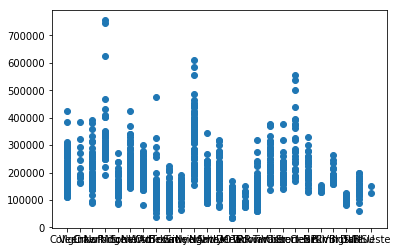

In [135]:
plt.scatter(housing.Neighborhood, housing.SalePrice)

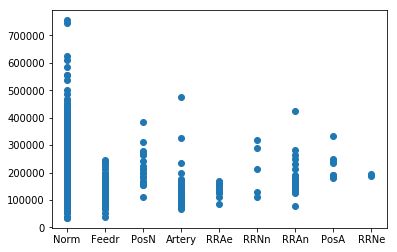

In [136]:
plt.scatter(housing.Condition1, housing.SalePrice)

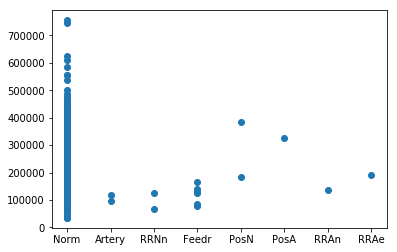

In [137]:
plt.scatter(housing.Condition2, housing.SalePrice)

will not drop Condition2 since there are few differences where switching the Condition1 and Condition2 values can be done to maintain data integrity i.e some rows say RRNn for Cond1 and Norm for Cond2. some say Norm for Cond1 and RRNn for Cond2

# building_house_col

In [138]:
building_house_col

['BldgType', 'HouseStyle']

In [139]:
housing[building_house_col]

,BldgType,HouseStyle
Id,,
1,1Fam,2Story
2,1Fam,1Story
3,1Fam,2Story
4,1Fam,2Story
5,1Fam,2Story
6,1Fam,1.5Fin
7,1Fam,1Story
8,1Fam,2Story
9,1Fam,1.5Fin


In [140]:
housing.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [142]:
housing.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

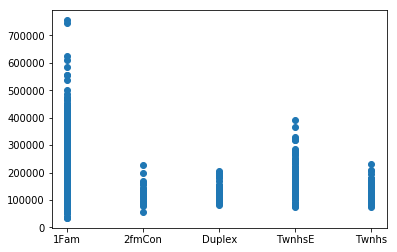

In [143]:
plt.scatter(housing.BldgType, housing.SalePrice)

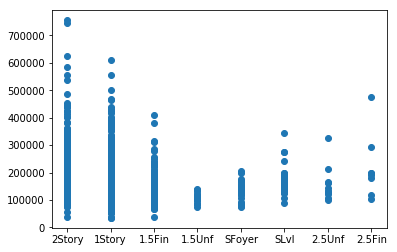

In [144]:
plt.scatter(housing.HouseStyle, housing.SalePrice)

In [145]:
df_bldg_house = categorical_matrix(building_house_col)

1Fam : BldgType

2Story : HouseStyle
362
1Fam : BldgType

1Story : HouseStyle
607
1Fam : BldgType

1.5Fin : HouseStyle
142
1Fam : BldgType

1.5Unf : HouseStyle
13
1Fam : BldgType

SFoyer : HouseStyle
20
1Fam : BldgType

SLvl : HouseStyle
60
1Fam : BldgType

2.5Unf : HouseStyle
9
1Fam : BldgType

2.5Fin : HouseStyle
7
2fmCon : BldgType

2Story : HouseStyle
11
2fmCon : BldgType

1Story : HouseStyle
7
2fmCon : BldgType

1.5Fin : HouseStyle
8
2fmCon : BldgType

1.5Unf : HouseStyle
1
2fmCon : BldgType

SFoyer : HouseStyle
0
2fmCon : BldgType

SLvl : HouseStyle
1
2fmCon : BldgType

2.5Unf : HouseStyle
2
2fmCon : BldgType

2.5Fin : HouseStyle
1
Duplex : BldgType

2Story : HouseStyle
9
Duplex : BldgType

1Story : HouseStyle
29
Duplex : BldgType

1.5Fin : HouseStyle
4
Duplex : BldgType

1.5Unf : HouseStyle
0
Duplex : BldgType

SFoyer : HouseStyle
9
Duplex : BldgType

SLvl : HouseStyle
1
Duplex : BldgType

2.5Unf : HouseStyle
0
Duplex : BldgType

2.5Fin : HouseStyle
0
TwnhsE : BldgType

2Story :

In [146]:
df_bldg_house

,Value1,Feature1,Value2,Feature2,Count
0,1Fam,BldgType,2Story,HouseStyle,362
1,1Fam,BldgType,1Story,HouseStyle,607
2,1Fam,BldgType,1.5Fin,HouseStyle,142
3,1Fam,BldgType,1.5Unf,HouseStyle,13
4,1Fam,BldgType,SFoyer,HouseStyle,20
5,1Fam,BldgType,SLvl,HouseStyle,60
6,1Fam,BldgType,2.5Unf,HouseStyle,9
7,1Fam,BldgType,2.5Fin,HouseStyle,7
8,2fmCon,BldgType,2Story,HouseStyle,11
9,2fmCon,BldgType,1Story,HouseStyle,7


# roof_col

In [147]:
roof_col

['RoofStyle', 'RoofMatl']

In [148]:
housing[roof_col]

,RoofStyle,RoofMatl
Id,,
1,Gable,CompShg
2,Gable,CompShg
3,Gable,CompShg
4,Gable,CompShg
5,Gable,CompShg
6,Gable,CompShg
7,Gable,CompShg
8,Gable,CompShg
9,Gable,CompShg


In [149]:
housing.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

In [150]:
housing.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

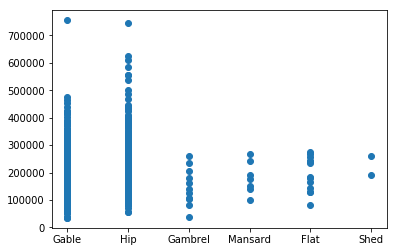

In [151]:
plt.scatter(housing.RoofStyle, housing.SalePrice)

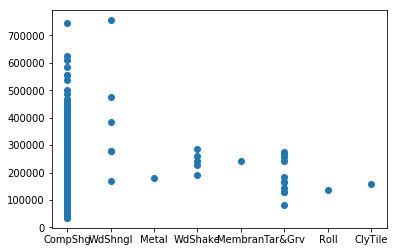

In [152]:
plt.scatter(housing.RoofMatl,housing.SalePrice)

# Exterior_col

In [153]:
exterior_col

['Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond']

In [154]:
housing[exterior_col]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
Id,,,,,,
1,VinylSd,VinylSd,BrkFace,196.0,Gd,TA
2,MetalSd,MetalSd,None,0.0,TA,TA
3,VinylSd,VinylSd,BrkFace,162.0,Gd,TA
4,Wd Sdng,Wd Shng,None,0.0,TA,TA
5,VinylSd,VinylSd,BrkFace,350.0,Gd,TA
6,VinylSd,VinylSd,None,0.0,TA,TA
7,VinylSd,VinylSd,Stone,186.0,Gd,TA
8,HdBoard,HdBoard,Stone,240.0,TA,TA
9,BrkFace,Wd Shng,None,0.0,TA,TA


In [155]:
housing.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [156]:
housing.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [159]:
housing[housing.Exterior1st != housing.Exterior2nd].shape
housing[housing.Exterior1st != housing.Exterior2nd]

(215, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,70,RL,60.000000,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Pool,No_Fence,No_MF,0,2,2006,WD,Abnorml,140000
9,50,RM,51.000000,6120,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No_Pool,No_Fence,No_MF,0,4,2008,WD,Abnorml,129900
12,60,RL,85.000000,11924,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,No_Pool,No_Fence,No_MF,0,7,2006,New,Partial,345000
13,20,RL,76.572229,12968,Pave,No_Alley,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,No_FP,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,No_Pool,No_Fence,No_MF,0,9,2008,WD,Normal,144000
20,20,RL,70.000000,7560,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,TA,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,No_FP,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,No_Pool,MnPrv,No_MF,0,5,2009,COD,Abnorml,139000
24,120,RM,44.000000,4224,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,1Story,5,7,1976,1976,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,840,Unf,0,200,1040,GasA,TA,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,Unf,2,572,TA,TA,Y,100,110,0,0,0,0,No_Pool,No_Fence,No_MF,0,6,2007,WD,Normal,129900
40,90,RL,65.000000,6040,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No_BQ,No_BC,No_BE,No_BFT1,0,No_BFT2,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No_FP,No_GT,1955.0,No_GF,0,0,No_GQ,No_GC,N,0,0,0,0,0,0,No_Pool,No_Fence,No_MF,0,6,2008,WD,AdjLand,82000
45,20,RL,70.000000,7945,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,179,BLQ,506,465,1150,GasA,Ex,Y,FuseA,1150,0,0,1150,1,0,1,0,3,1,TA,6,Typ,0,No_FP,Attchd,1959.0,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,No_MF,0,5,2006,WD,Normal,141000
54,20,RL,68.000000,50271,Pave,No_Alley,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,

cement bd board is spelled differently in housing Exterior1 and Exterior2

maybe we should test a new feature that is binary on whether exterior1 = exterior2

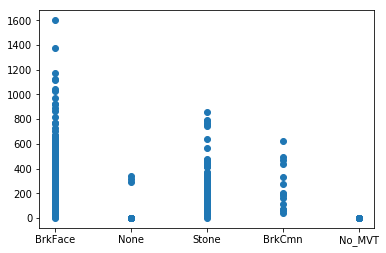

In [160]:
plt.scatter(housing.MasVnrType,housing.MasVnrArea)

In [161]:
categorical_matrix(['ExterQual','ExterCond'])

Gd : ExterQual

TA : ExterCond
453
Gd : ExterQual

Gd : ExterCond
35
Gd : ExterQual

Fa : ExterCond
0
Gd : ExterQual

Po : ExterCond
0
Gd : ExterQual

Ex : ExterCond
0
TA : ExterQual

TA : ExterCond
773
TA : ExterQual

Gd : ExterCond
108
TA : ExterQual

Fa : ExterCond
22
TA : ExterQual

Po : ExterCond
1
TA : ExterQual

Ex : ExterCond
2
Ex : ExterQual

TA : ExterCond
48
Ex : ExterQual

Gd : ExterCond
3
Ex : ExterQual

Fa : ExterCond
0
Ex : ExterQual

Po : ExterCond
0
Ex : ExterQual

Ex : ExterCond
1
Fa : ExterQual

TA : ExterCond
8
Fa : ExterQual

Gd : ExterCond
0
Fa : ExterQual

Fa : ExterCond
6
Fa : ExterQual

Po : ExterCond
0
Fa : ExterQual

Ex : ExterCond
0
TA : ExterCond

Gd : ExterQual
453
TA : ExterCond

TA : ExterQual
773
TA : ExterCond

Ex : ExterQual
48
TA : ExterCond

Fa : ExterQual
8
Gd : ExterCond

Gd : ExterQual
35
Gd : ExterCond

TA : ExterQual
108
Gd : ExterCond

Ex : ExterQual
3
Gd : ExterCond

Fa : ExterQual
0
Fa : ExterCond

Gd : ExterQual
0
Fa : ExterCond

TA : Exter

,Value1,Feature1,Value2,Feature2,Count
0,Gd,ExterQual,TA,ExterCond,453
1,Gd,ExterQual,Gd,ExterCond,35
2,Gd,ExterQual,Fa,ExterCond,0
3,Gd,ExterQual,Po,ExterCond,0
4,Gd,ExterQual,Ex,ExterCond,0
5,TA,ExterQual,TA,ExterCond,773
6,TA,ExterQual,Gd,ExterCond,108
7,TA,ExterQual,Fa,ExterCond,22
8,TA,ExterQual,Po,ExterCond,1
9,TA,ExterQual,Ex,ExterCond,2


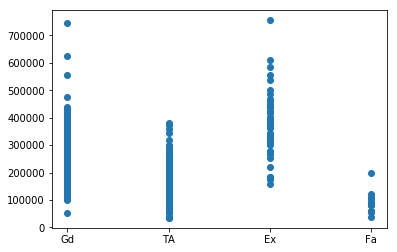

In [162]:
plt.scatter(housing.ExterQual,housing.SalePrice)

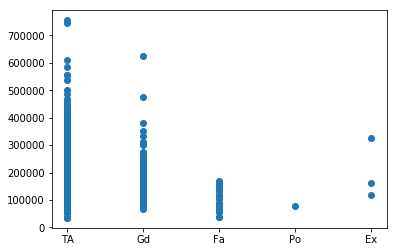

In [163]:
plt.scatter(housing.ExterCond, housing.SalePrice)

def label encode both ExterQual and ExterCond and multiply and plot vs SalePrice

In [166]:
categorical_matrix(['Exterior1st','ExterQual'])

,Value1,Feature1,Value2,Feature2,Count
0,VinylSd,Exterior1st,Gd,ExterQual,326
1,VinylSd,Exterior1st,TA,ExterQual,161
2,VinylSd,Exterior1st,Ex,ExterQual,24
3,VinylSd,Exterior1st,Fa,ExterQual,4
4,MetalSd,Exterior1st,Gd,ExterQual,34
5,MetalSd,Exterior1st,TA,ExterQual,176
6,MetalSd,Exterior1st,Ex,ExterQual,8
7,MetalSd,Exterior1st,Fa,ExterQual,2
8,Wd Sdng,Exterior1st,Gd,ExterQual,28
9,Wd Sdng,Exterior1st,TA,ExterQual,172


In [167]:
categorical_matrix(['Exterior1st','ExterCond'])

,Value1,Feature1,Value2,Feature2,Count
0,VinylSd,Exterior1st,TA,ExterCond,476
1,VinylSd,Exterior1st,Gd,ExterCond,34
2,VinylSd,Exterior1st,Fa,ExterCond,4
3,VinylSd,Exterior1st,Po,ExterCond,0
4,VinylSd,Exterior1st,Ex,ExterCond,1
5,MetalSd,Exterior1st,TA,ExterCond,175
6,MetalSd,Exterior1st,Gd,ExterCond,40
7,MetalSd,Exterior1st,Fa,ExterCond,4
8,MetalSd,Exterior1st,Po,ExterCond,0
9,MetalSd,Exterior1st,Ex,ExterCond,1


In [168]:
categorical_matrix(['Exterior2nd','ExterQual'])

,Value1,Feature1,Value2,Feature2,Count
0,VinylSd,Exterior2nd,Gd,ExterQual,321
1,VinylSd,Exterior2nd,TA,ExterQual,157
2,VinylSd,Exterior2nd,Ex,ExterQual,23
3,VinylSd,Exterior2nd,Fa,ExterQual,3
4,MetalSd,Exterior2nd,Gd,ExterQual,34
5,MetalSd,Exterior2nd,TA,ExterQual,170
6,MetalSd,Exterior2nd,Ex,ExterQual,8
7,MetalSd,Exterior2nd,Fa,ExterQual,2
8,Wd Shng,Exterior2nd,Gd,ExterQual,9
9,Wd Shng,Exterior2nd,TA,ExterQual,26


In [169]:
categorical_matrix(['Exterior2nd','ExterCond'])

,Value1,Feature1,Value2,Feature2,Count
0,VinylSd,Exterior2nd,TA,ExterCond,464
1,VinylSd,Exterior2nd,Gd,ExterCond,35
2,VinylSd,Exterior2nd,Fa,ExterCond,4
3,VinylSd,Exterior2nd,Po,ExterCond,0
4,VinylSd,Exterior2nd,Ex,ExterCond,1
5,MetalSd,Exterior2nd,TA,ExterCond,170
6,MetalSd,Exterior2nd,Gd,ExterCond,39
7,MetalSd,Exterior2nd,Fa,ExterCond,4
8,MetalSd,Exterior2nd,Po,ExterCond,0
9,MetalSd,Exterior2nd,Ex,ExterCond,1


seems like there is a slight hierarchel structure regarding the exterior and the quality/condition it brings
just keep note of that

# bsmt_col

In [170]:
bsmt_col

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [171]:
housing[bsmt_col]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
1,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0
2,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
3,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0
4,TA,Gd,No,ALQ,216,Unf,0,540,756,1,0
5,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0
6,Gd,TA,No,GLQ,732,Unf,0,64,796,1,0
7,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,1,0
8,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,1,0
9,TA,TA,No,Unf,0,Unf,0,952,952,0,0


In [172]:
for i in bsmt_col:
    housing[i].value_counts()

TA       649
Gd       618
Ex       121
No_BQ     37
Fa        35
Name: BsmtQual, dtype: int64

TA       1311
Gd         65
Fa         45
No_BC      37
Po          2
Name: BsmtCond, dtype: int64

No       954
Av       221
Gd       134
Mn       114
No_BE     37
Name: BsmtExposure, dtype: int64

Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
No_BFT1     37
Name: BsmtFinType1, dtype: int64

0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
400       4
300       4
312       4
495       4
384       4
697       4
641       4
360       4
560       4
588       4
547       4
504       4
600       4
553       4
674       3
1036      3
403       3
672       3
624       3
595       3
680       3
378       3
375       3
1274      3
1056      3
565       3
570       3
660       3
659       3
500       3
690       3
625       3
626       3
490       3
633       3
643       3
648       3
450       3
1218      3
507       3
510       3
656       3
1201      3
528       3
425       3
456       3
685       3
695       3
182       3
247       3
1300      3
904       3
767       3
210       3
196       3
786       3
180       3
280       3
168       3
789       3
120       3
812       3
816       3
828       3
28        3
250       3
569       3
733       3
297       3
288       3
340       3
732 

Unf        1256
Rec          55
LwQ          46
No_BFT2      37
BLQ          33
ALQ          19
GLQ          14
Name: BsmtFinType2, dtype: int64

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

0       118
728       9
384       8
572       7
600       7
300       7
440       6
625       6
280       6
672       6
270       6
162       5
108       5
490       5
390       5
80        5
326       5
816       5
698       5
319       5
264       5
216       5
410       5
638       4
768       4
780       4
660       4
420       4
840       4
556       4
544       4
536       4
747       4
684       4
847       4
350       4
396       4
186       4
36        4
88        4
92        4
100       4
115       4
125       4
163       4
168       4
192       4
392       4
276       4
284       4
312       4
324       4
336       4
340       4
912       4
360       4
884       4
611       4
130       3
596       3
378       3
288       3
811       3
808       3
448       3
588       3
594       3
522       3
278       3
413       3
148       3
140       3
742       3
598       3
135       3
133       3
132       3
506       3
292       3
121       3
504       3
602       3
114       3
756 

0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
848     11
780     11
894     11
832     10
630      9
756      9
952      9
1056     8
936      8
1008     7
483      7
840      7
384      7
720      7
600      7
1362     6
876      6
858      6
884      6
1392     6
796      6
793      5
1728     5
990      5
970      5
1092     5
960      5
1440     5
992      5
896      5
1144     5
928      5
686      5
684      5
1208     4
1494     4
784      4
1057     4
980      4
804      4
1314     4
1188     4
764      4
588      4
660      4
847      4
855      4
924      4
910      4
880      4
689      4
616      4
1050     4
747      4
1029     4
546      4
735      4
698      4
1080     4
1026     4
1078     4
1064     4
1065     3
264      3
948      3
1120     3
940      3
901      3
1073     3
907      3
1053     3
925      3
612      3
1127     3
916      3
1372     3
1128     3
918      3
1268     3
520      3
1104     3
1117     3
1032     3

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [173]:
housing.BsmtFinSF1 + housing.BsmtFinSF2 + housing.BsmtUnfSF - housing.TotalBsmtSF

Id
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
100    

housing.TotalBsmtSF is comprised of the addition of values of 3 other features. we should drop it

number of bathrooms/half baths in bsmt is super skewed towards 0, alot of 0 values. something to test for adding binary feature on.

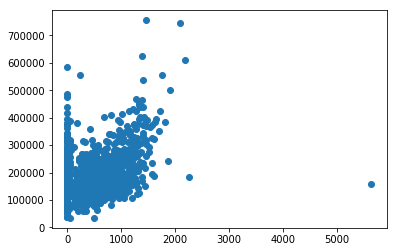

In [174]:
plt.scatter(housing.BsmtFinSF1,housing.SalePrice)

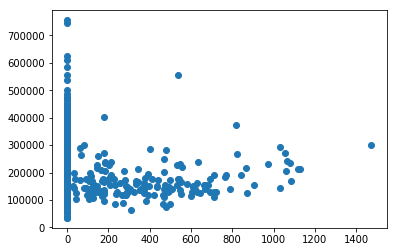

In [175]:
plt.scatter(housing.BsmtFinSF2,housing.SalePrice)

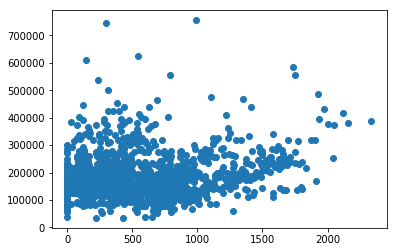

In [177]:
plt.scatter(housing.BsmtUnfSF,housing.SalePrice)

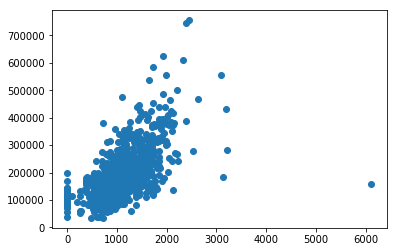

In [179]:
plt.scatter(housing.TotalBsmtSF,housing.SalePrice)

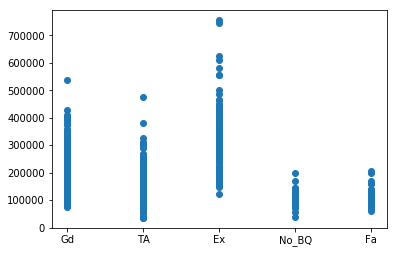

In [180]:
plt.scatter(housing.BsmtQual,housing.SalePrice)

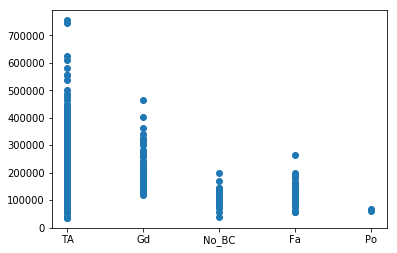

In [181]:
plt.scatter(housing.BsmtCond,housing.SalePrice)

In [182]:
bsmt_col

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

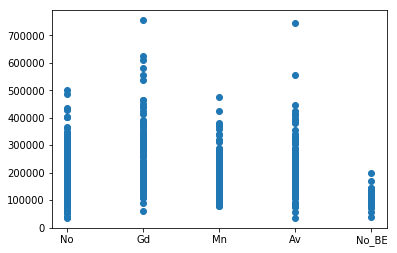

In [183]:
plt.scatter(housing.BsmtExposure,housing.SalePrice)

seems more of a ordinal relationship in qual and cond, not much in exposure

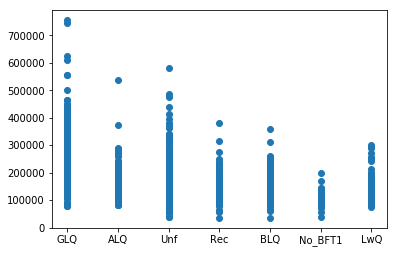

In [184]:
plt.scatter(housing.BsmtFinType1,housing.SalePrice)

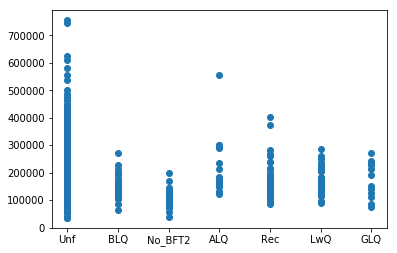

In [185]:
plt.scatter(housing.BsmtFinType2,housing.SalePrice)

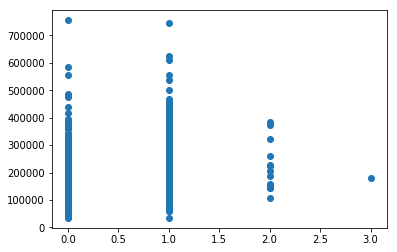

In [186]:
plt.scatter(housing.BsmtFullBath,housing.SalePrice)

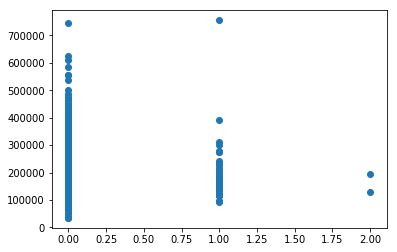

In [187]:
plt.scatter(housing.BsmtHalfBath,housing.SalePrice)

remember to check for skewness in these categorical features which have ALOT of zeros

In [188]:
energy_col

['Heating', 'HeatingQC', 'CentralAir', 'Electrical']

In [189]:
for i in energy_col:
    housing[i].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Y    1365
N      95
Name: CentralAir, dtype: int64

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

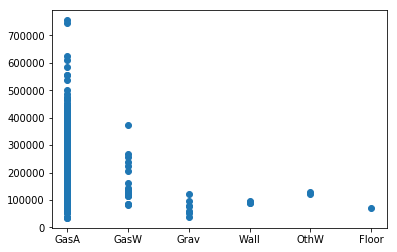

In [191]:
plt.scatter(housing.Heating, housing.SalePrice)

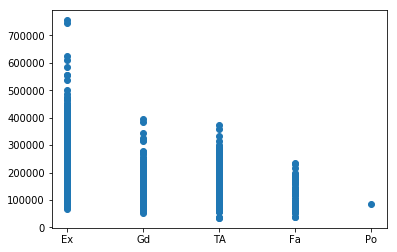

In [192]:
plt.scatter(housing.HeatingQC, housing.SalePrice)

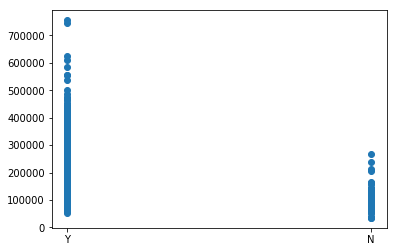

In [193]:
plt.scatter(housing.CentralAir, housing.SalePrice)

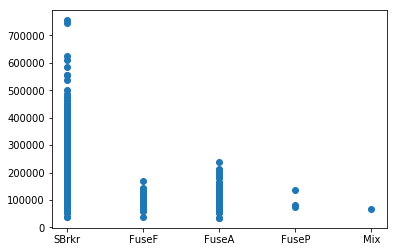

In [194]:
plt.scatter(housing.Electrical, housing.SalePrice)

# floors_col

In [195]:
floors_col

['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

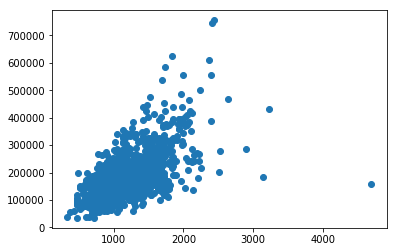

In [196]:
plt.scatter(housing['1stFlrSF'], housing.SalePrice)

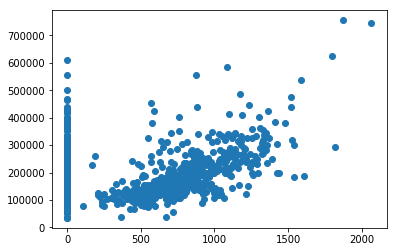

In [197]:
plt.scatter(housing['2ndFlrSF'], housing.SalePrice)

maybe add a feature that lists 2nd flr as binary to cover for zeros

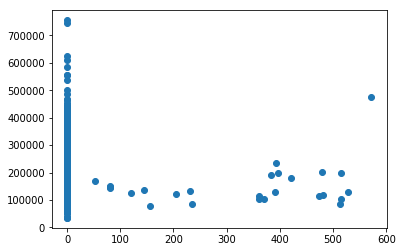

In [198]:
plt.scatter(housing['LowQualFinSF'], housing.SalePrice)

maybe add feature that says whether lowqualfinsf is zero, as binary

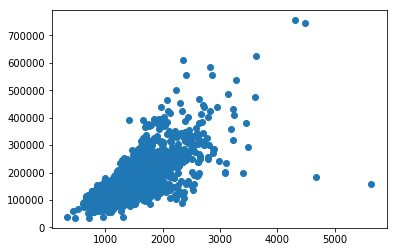

In [199]:
plt.scatter(housing['GrLivArea'], housing.SalePrice)

maybe remove 2 outliers at bottom right corner??

# rooms_col

In [200]:
rooms_col

['FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd']

In [201]:
for i in rooms_col:
    housing[i].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

0    913
1    535
2     12
Name: HalfBath, dtype: int64

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [216]:
#creating generator function for iterating through my feature sets for plotting

def generator(list):
    i = 0
    while i != len(list):
        yield list[i]
        i+=1

In [223]:
gen_rooms_col= generator(rooms_col)

FullBath


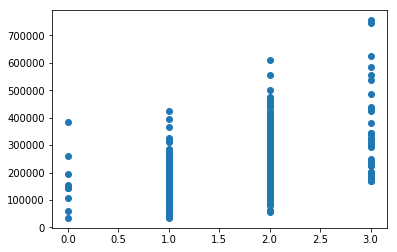

In [224]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

slight linearity regarding fullbath, look into label_encoding

HalfBath


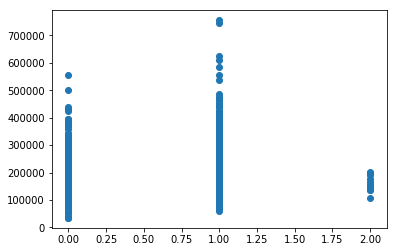

In [225]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

BedroomAbvGr


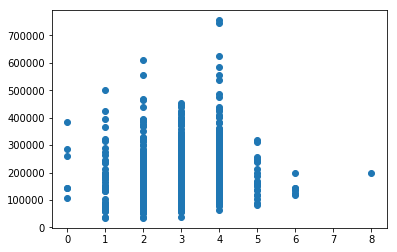

In [226]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

KitchenAbvGr


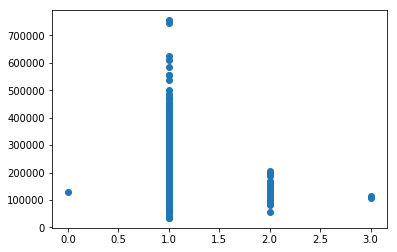

In [227]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

KitchenQual


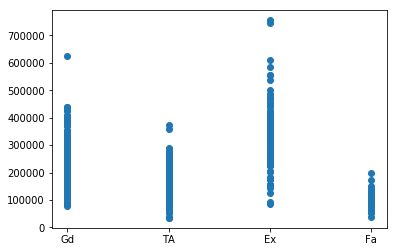

In [228]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

slight linearity regarding kitchenqual, look into label_encoding

TotRmsAbvGrd


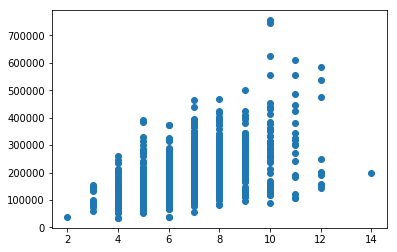

In [229]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

def linearity regarding totRmsAbvGrd, def keep as continuous variable

In [230]:
this_feature = next(gen_rooms_col)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

StopIteration: 

all features in rooms_col should be linear vs saleprice, plan on keeping all as continus variables or labelencode

# fireplaces

In [231]:
fireplace_col

['Fireplaces', 'FireplaceQu']

In [232]:
for i in fireplace_col:
    housing[i].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

No_FP    690
Gd       380
TA       313
Fa        33
Ex        24
Po        20
Name: FireplaceQu, dtype: int64

In [240]:
gen_fireplace = generator(fireplace_col)

Fireplaces


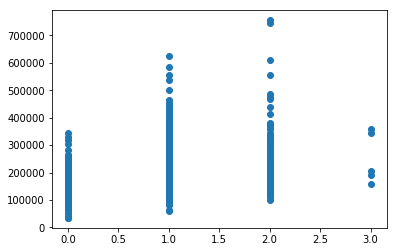

In [241]:
this_feature = next(gen_fireplace)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

FireplaceQu


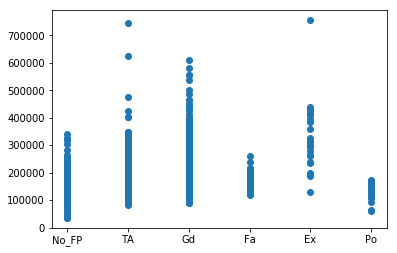

In [242]:
this_feature = next(gen_fireplace)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

probably label encode fireplaceQC, seems linear-ish

# garage

In [243]:
garage_col

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [247]:
def run_through_value_counts(list):
    for i in list:
        print(housing[i].value_counts())

In [248]:
run_through_value_counts(garage_col)

Attchd     870
Detchd     387
BuiltIn     88
No_GT       81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
2005.0    65
2006.0    60
2004.0    54
2007.0    50
2003.0    50
1977.0    36
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
1968.0    27
2002.0    26
1950.0    24
1970.0    23
1993.0    22
1965.0    22
1958.0    22
1962.0    21
1966.0    21
2009.0    21
1957.0    20
1978.0    20
1954.0    20
1996.0    20
2001.0    20
1960.0    19
1920.0    19
1997.0    19
1994.0    19
1974.0    19
1959.0    19
1940.0    18
1995.0    18
1964.0    18
1990.0    17
1971.0    17
1956.0    17
1963.0    16
1972.0    16
1967.0    15
1969.0    15
1980.0    15
1955.0    15
1979.0    15
1988.0    14
1973.0    14
1961.0    14
1992.0    13
1987.0    12
1941.0    12
1953.0    12
1925.0    11
1985.0    11
1948.0    11
1991.0    10
1989.0    10
1930.0    10
1975.0    10
1981.0    10
1939.0     9
1949.0     9
1922.0     8
1984.0     8
1910.0     8
1926.0     7
1983.0

In [249]:
gen_garage = generator(garage_col)

GarageType


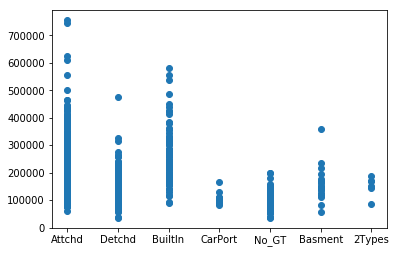

In [250]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

no pattern here, just onehotencode

GarageYrBlt


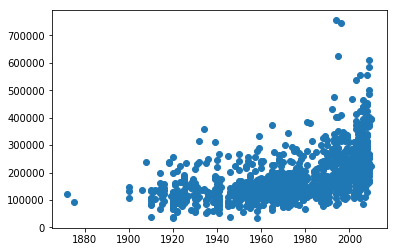

In [251]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

maybe transformation on garageyrblt to improve linearity

GarageFinish


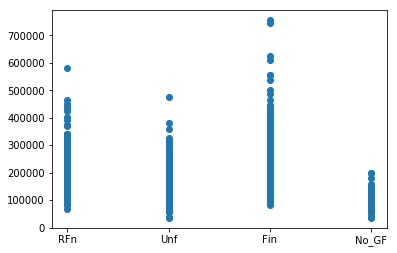

In [252]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

seems like it should be linear, look into label encoding

GarageCars


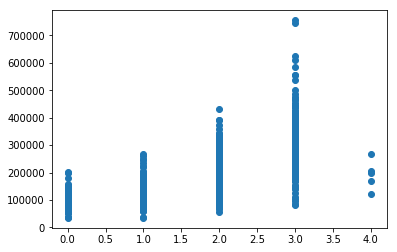

In [253]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

labelencode

GarageArea


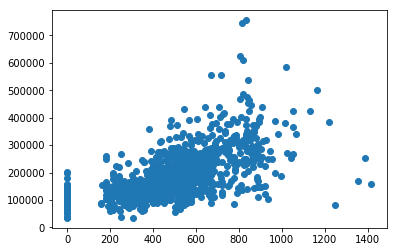

In [254]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

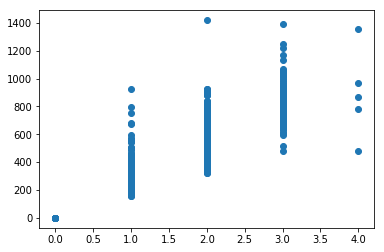

In [260]:
plt.scatter(housing.GarageCars,housing.GarageArea)

perhaps high multicollinearity between cars capacity and garagearea

GarageQual


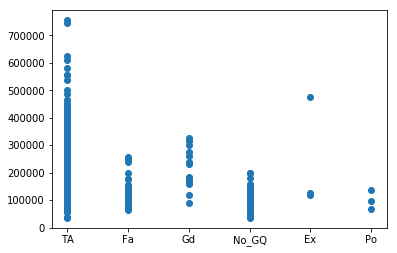

In [255]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

look into labelencoding

GarageCond


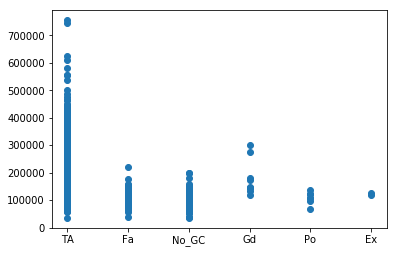

In [256]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

PavedDrive


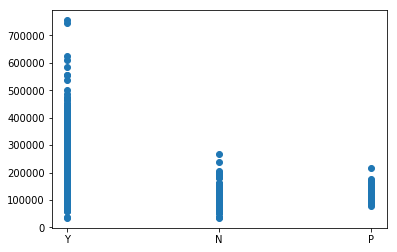

In [257]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

def onehotencode

In [258]:
this_feature = next(gen_garage)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

StopIteration: 

# Porch

In [263]:
porch_col

['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [264]:
run_through_value_counts(porch_col)

0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
240     10
208     10
216      9
180      8
160      8
250      6
132      6
264      6
143      6
96       6
156      6
171      5
48       5
196      5
105      5
288      5
210      5
220      4
158      4
104      4
147      4
74       4
64       4
125      4
182      4
36       4
188      3
113      3
335      3
112      3
108      3
239      3
280      3
40       3
178      3
149      3
150      3
142      3
80       3
72       3
270      3
165      3
268      3
88       3
198      3
164      3
172      3
201      3
203      3
261      2
253      2
252      2
272      2
135      2
256      2
276      2
136      2
262      2
138      2
228      2
146      2
148      2
184      2
185      2
186      2
169      2
194      2
166      2
200      2
206      2
161      2
209      2
212      2
214      2
219      2
222      2
290      2
155      2
154      2
237      2
238      2
289      2
127      2

In [265]:
gen_porch = generator(porch_col)

WoodDeckSF


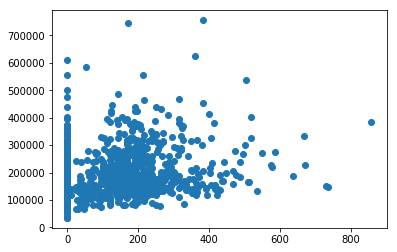

In [266]:
this_feature = next(gen_porch)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

OpenPorchSF


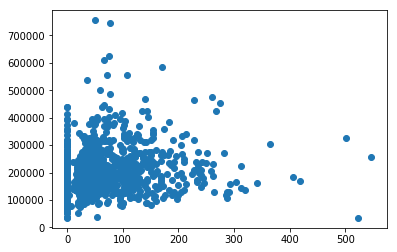

In [267]:
this_feature = next(gen_porch)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

EnclosedPorch


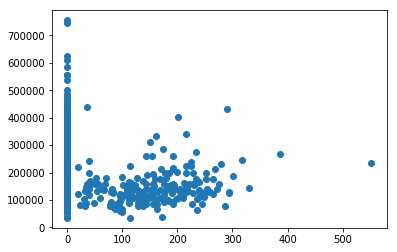

In [268]:
this_feature = next(gen_porch)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

3SsnPorch


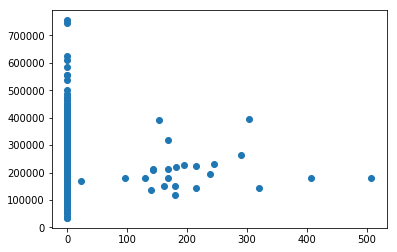

In [269]:
this_feature = next(gen_porch)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

ScreenPorch


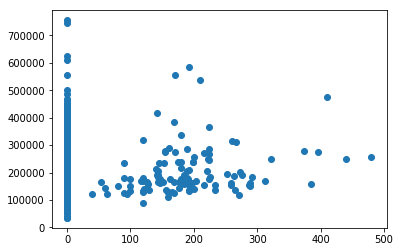

In [270]:
this_feature = next(gen_porch)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

In [271]:
this_feature = next(gen_porch)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)
plt.xlabel=this_feature

StopIteration: 

either need to add categorical binary variable to help model understand huge about of zeros or figure something else out

# pool


In [272]:
pool_col

['PoolArea', 'PoolQC']

In [273]:
run_through_value_counts(pool_col)

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64
No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64


In [280]:
gen_pool = generator(pool_col)

PoolArea


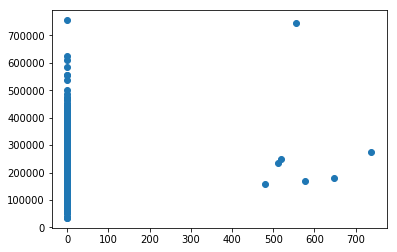

In [281]:
this_feature = next(gen_pool)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)


PoolQC


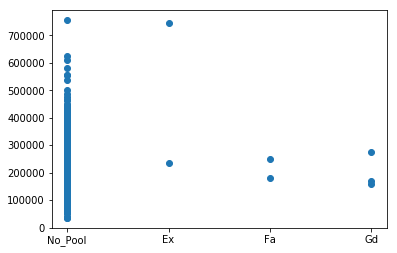

In [282]:
this_feature = next(gen_pool)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

either create a binary variable to account for zeros or simply change all non_zeros to 1 which effectively makes it a binary variable, not sure having the minor linearly relationship of the continuous portion is worth adding an extra feature

# fence

In [283]:
housing.Fence.value_counts()

No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

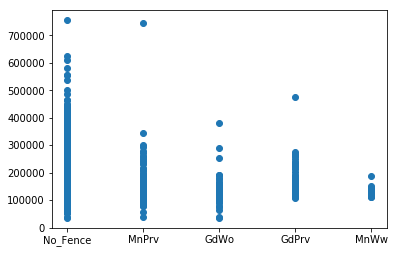

In [284]:
plt.scatter(housing.Fence, housing.SalePrice)

this is a very random/convoluted set of classes for this feature, probably lean towards onehot encoding

# MiscFeatures

In [285]:
misc_col

['MiscFeature', 'MiscVal']

In [286]:
run_through_value_counts(misc_col)

No_MF    1406
Shed       49
Othr        2
Gar2        2
TenC        1
Name: MiscFeature, dtype: int64
0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64


In [287]:
gen_misc = generator(misc_col)

MiscFeature


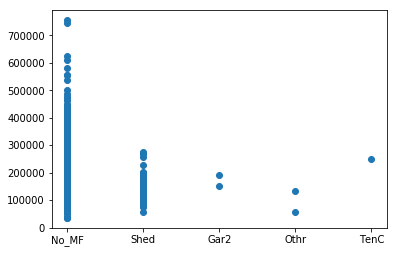

In [288]:
this_feature = next(gen_misc)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

MiscVal


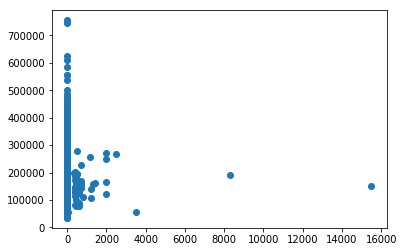

In [289]:
this_feature = next(gen_misc)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

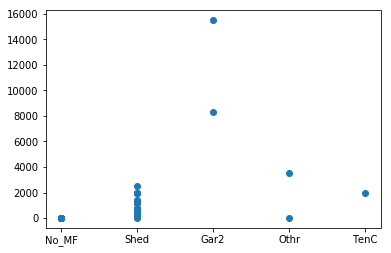

In [290]:
plt.scatter(housing.MiscFeature, housing.MiscVal)

this feature is just straight up fucked, a ton of zero values, very sporatic/different values for teh other classes, all over the time. at best onehotencode, at worst, drop entirely

# Sale conditions

In [291]:
sale_col

['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [292]:
run_through_value_counts(sale_col)

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [293]:
gen_sale = generator(sale_col)

MoSold


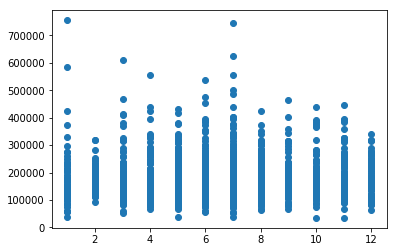

In [294]:
this_feature = next(gen_sale)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

seems pretty uniform, lets go with onehotencode

YrSold


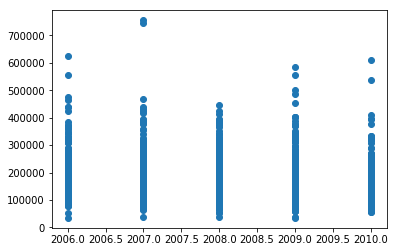

In [295]:
this_feature = next(gen_sale)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

def categorical and onehotencoder

SaleType


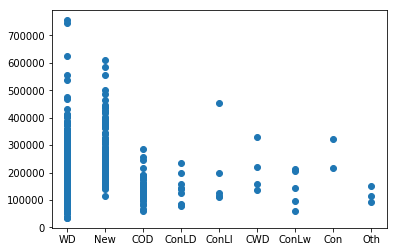

In [296]:
this_feature = next(gen_sale)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

onehotencoder

SaleCondition


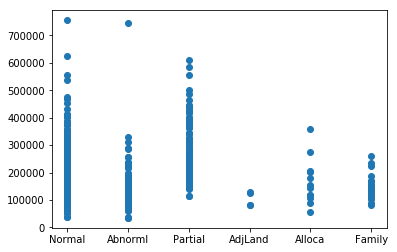

In [297]:
this_feature = next(gen_sale)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

onehotencode. no real relationship

In [298]:
this_feature = next(gen_sale)
print(this_feature)
plt.scatter(housing[this_feature],housing.SalePrice)

StopIteration: 